# Libraries

In [1]:
# install.packages('')

In [12]:
library(caTools)
library(ggplot2)
library(repr)
options(repr.plot.width=4,repr.plot.height=4)
library(randomForest)

# Read data

In [13]:
root_dir="~/Documents/Education/20170623 Udemy - Machine Learning A-Z: Hands-On Python and R in Data Science/"
work_dir="Course data/Part 3 - Classification/Section 20 - Random Forest Classification"
setwd(paste(root_dir,work_dir,sep=''))
df=read.csv('Social_Network_Ads.csv')[c('Age','EstimatedSalary','Purchased')]
str(df)

'data.frame':	400 obs. of  3 variables:
 $ Age            : int  19 35 26 27 19 27 27 32 25 35 ...
 $ EstimatedSalary: int  19000 20000 43000 57000 76000 58000 84000 150000 33000 65000 ...
 $ Purchased      : int  0 0 0 0 0 0 0 1 0 0 ...


# Factorize labels

In [14]:
df$Purchased=factor(df$Purchased)

# Scale

In [15]:
df[,c('Age','EstimatedSalary')]=scale(df[,c('Age','EstimatedSalary')])
str(df)

'data.frame':	400 obs. of  3 variables:
 $ Age            : num  -1.78 -0.253 -1.112 -1.016 -1.78 ...
 $ EstimatedSalary: num  -1.488 -1.459 -0.784 -0.374 0.184 ...
 $ Purchased      : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 2 1 1 ...


# Train/test

In [16]:
set.seed(123)
split=sample.split(df$Purchased, SplitRatio=0.75)
training_set=subset(df,split)
test_set=subset(df,!split)
print(noquote(paste('Training set:',paste(dim(training_set),collapse='x'))))
print(noquote(paste('Test set:',paste(dim(test_set),collapse='x'))))

[1] Training set: 300x3
[1] Test set: 100x3


# Random Forest

In [17]:
range_plot_X=function(x,num,ext){
    delta=max(x)-min(x)
    return(seq(min(x)-ext*delta,max(x)+ext*delta,length.out=num))
}

In [18]:
X_plot=range_plot_X(df$Age,1000,0.1)
Y_plot=range_plot_X(df$EstimatedSalary,1000,0.1)
XY_grid=expand.grid(X_plot,Y_plot)
colnames(XY_grid)=c('Age','EstimatedSalary')


=== Random Forests, 10 trees ===

Classifier summary:
                Length Class  Mode     
call              4    -none- call     
type              1    -none- character
predicted       300    factor numeric  
err.rate         30    -none- numeric  
confusion         6    -none- numeric  
votes           600    matrix numeric  
oob.times       300    -none- numeric  
classes           2    -none- character
importance        2    -none- numeric  
importanceSD      0    -none- NULL     
localImportance   0    -none- NULL     
proximity         0    -none- NULL     
ntree             1    -none- numeric  
mtry              1    -none- numeric  
forest           14    -none- list     
y               300    factor numeric  
test              0    -none- NULL     
inbag             0    -none- NULL     
terms             3    terms  call     

Confusion matrix:
   y_pred
     0  1
  0 58  6
  1  8 28


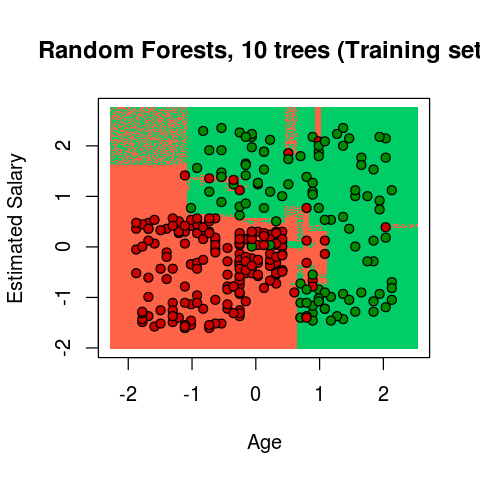

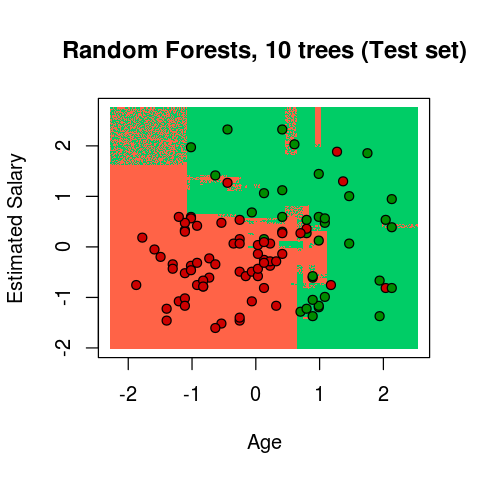

In [19]:
name='Random Forests, 10 trees'
writeLines(paste('\n===',name,'==='))
my_classifier=randomForest(formula=Purchased~.,data=training_set,ntree=10)
writeLines('\nClassifier summary:')
print(summary(my_classifier))
y_pred=predict(my_classifier,newdata=test_set,type='class')
writeLines('\nConfusion matrix:')
print(table(test_set$Purchased,y_pred))
y_pred_grid=predict(my_classifier,newdata=XY_grid,type='class')
plot(df[c('Age','EstimatedSalary')],
     main=paste(name,'(Training set)'),
     xlab='Age',ylab='Estimated Salary',
     xlim=range(X_plot),ylim=range(Y_plot))
contour(X_plot,Y_plot,matrix(as.numeric(y_pred_grid),length(X_plot),length(Y_plot)),add=TRUE)
points(XY_grid,pch='.',col=ifelse(y_pred_grid==1,'springgreen3','tomato'))
points(training_set[c('Age','EstimatedSalary')],pch=21,bg=ifelse(training_set$Purchased==1,'green4','red3'))
plot(df[c('Age','EstimatedSalary')],
     main=paste(name,'(Test set)'),
     xlab='Age',ylab='Estimated Salary',
     xlim=range(X_plot),ylim=range(Y_plot))
contour(X_plot,Y_plot,matrix(as.numeric(y_pred_grid),length(X_plot),length(Y_plot)),add=TRUE)
points(XY_grid,pch='.',col=ifelse(y_pred_grid==1,'springgreen3','tomato'))
points(test_set[c('Age','EstimatedSalary')],pch=21,bg=ifelse(test_set$Purchased==1,'green4','red3'))


=== Random Forests, 100 trees ===

Classifier summary:
                Length Class  Mode     
call              4    -none- call     
type              1    -none- character
predicted       300    factor numeric  
err.rate        300    -none- numeric  
confusion         6    -none- numeric  
votes           600    matrix numeric  
oob.times       300    -none- numeric  
classes           2    -none- character
importance        2    -none- numeric  
importanceSD      0    -none- NULL     
localImportance   0    -none- NULL     
proximity         0    -none- NULL     
ntree             1    -none- numeric  
mtry              1    -none- numeric  
forest           14    -none- list     
y               300    factor numeric  
test              0    -none- NULL     
inbag             0    -none- NULL     
terms             3    terms  call     

Confusion matrix:
   y_pred
     0  1
  0 59  5
  1  7 29


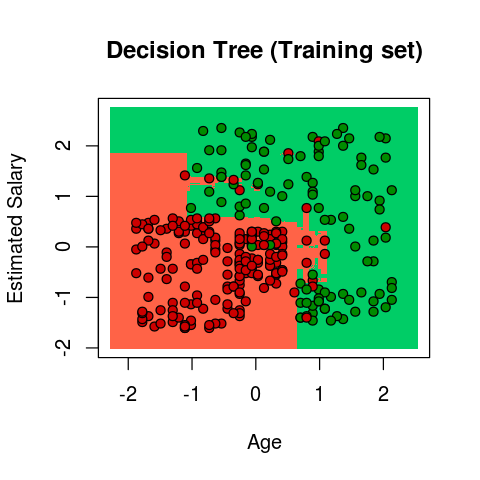

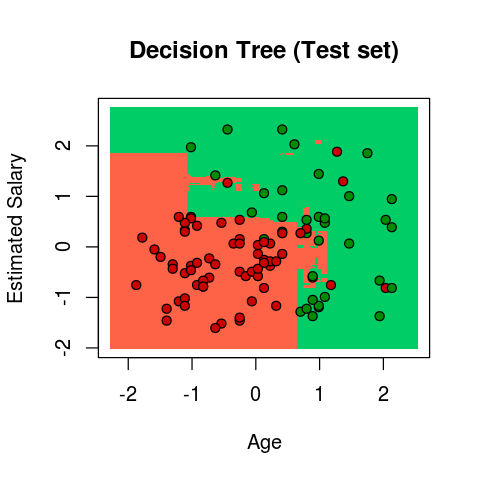

In [20]:
name='Random Forests, 100 trees'
writeLines(paste('\n===',name,'==='))
my_classifier=randomForest(formula=Purchased~.,data=training_set,ntree=100)
writeLines('\nClassifier summary:')
print(summary(my_classifier))
y_pred=predict(my_classifier,newdata=test_set,type='class')
writeLines('\nConfusion matrix:')
print(table(test_set$Purchased,y_pred))
y_pred_grid=predict(my_classifier,newdata=XY_grid,type='class')
plot(df[c('Age','EstimatedSalary')],
     main='Decision Tree (Training set)',
     xlab='Age',ylab='Estimated Salary',
     xlim=range(X_plot),ylim=range(Y_plot))
contour(X_plot,Y_plot,matrix(as.numeric(y_pred_grid),length(X_plot),length(Y_plot)),add=TRUE)
points(XY_grid,pch='.',col=ifelse(y_pred_grid==1,'springgreen3','tomato'))
points(training_set[c('Age','EstimatedSalary')],pch=21,bg=ifelse(training_set$Purchased==1,'green4','red3'))
plot(df[c('Age','EstimatedSalary')],
     main='Decision Tree (Test set)',
     xlab='Age',ylab='Estimated Salary',
     xlim=range(X_plot),ylim=range(Y_plot))
contour(X_plot,Y_plot,matrix(as.numeric(y_pred_grid),length(X_plot),length(Y_plot)),add=TRUE)
points(XY_grid,pch='.',col=ifelse(y_pred_grid==1,'springgreen3','tomato'))
points(test_set[c('Age','EstimatedSalary')],pch=21,bg=ifelse(test_set$Purchased==1,'green4','red3'))